In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

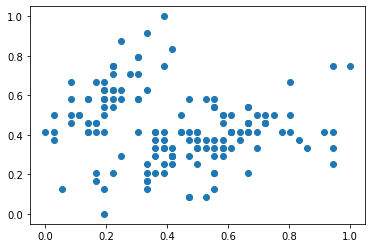

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X.shape

(150, 2)

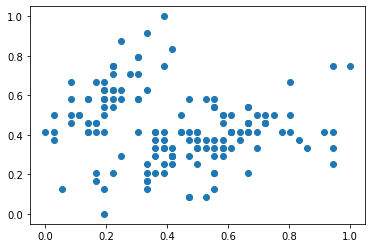

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [10]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [16]:
df = pd.DataFrame()
df["a1"]= X[:,0]
df["a2"] = X[:,1]
df["clase"]=kmeans.labels_
df

a1        a2  clase
0    0.222222  0.625000      0
1    0.166667  0.416667      0
2    0.111111  0.500000      0
3    0.083333  0.458333      0
4    0.194444  0.666667      0
..        ...       ...    ...
145  0.666667  0.416667      2
146  0.555556  0.208333      1
147  0.611111  0.416667      2
148  0.527778  0.583333      2
149  0.444444  0.416667      1

[150 rows x 3 columns]

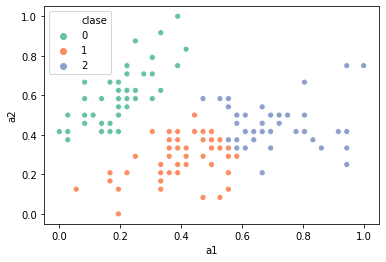

In [17]:
sns.scatterplot(df["a1"],df["a2"],hue = df["clase"], palette="Set2")
plt.show()

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="random", max_iter=20, tol = 0.002, n_jobs=-1)
kmeans.fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [19]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='random', max_iter=20, n_clusters=3,
       n_init=10, n_jobs=-1, precompute_distances='auto', random_state=None,
       tol=0.002, verbose=0)>

In [20]:
kmeans.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.69562648, 0.45390071],
       [0.19897959, 0.60459184]])

In [21]:
kmeans.n_iter_

4

In [22]:
kmeans.inertia_

4.115194202754065

In [32]:
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[12.797757201646089,
 6.8552905260332775,
 4.115194202754065,
 3.217483856523378,
 2.5594390221095242,
 2.1000615705604577,
 1.8148197915135778,
 1.5329369415611636,
 1.320788651405481,
 1.1091728440990596]

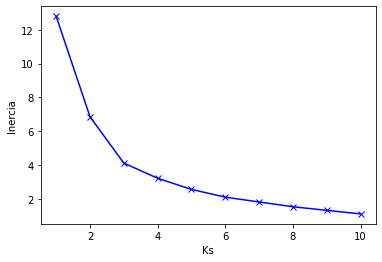

In [33]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()